In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

Prepare data

In [2]:
df = pd.read_csv('data/DatasetEV3.csv')
df = df[df['100% representative']==1]
df = df[df['environmental_context'].notna()]
df = df[df['Rate mean [s-1]'].notna()]
df['environmental_context'] = df['environmental_context'].replace('acidic pond', 'pond')
df['environmental_context'] = df['environmental_context'].replace("soil", "ground")

category_order = ['fresh water', 'ground', 'salt water']

colors = {'fresh water': '#8edccfff', 'ground': '#d38d5fff', 'salt water': '#87aadeff'}

Plot

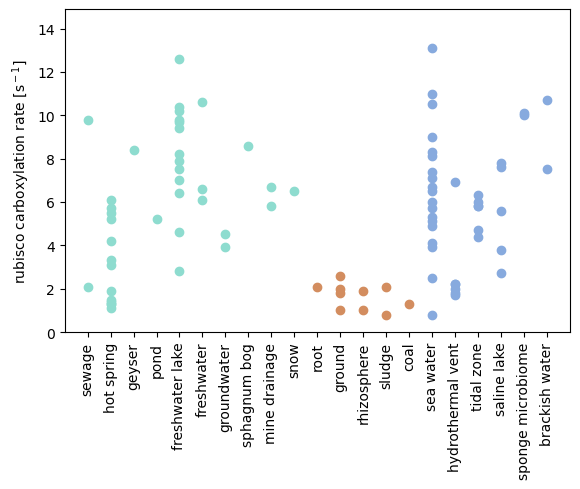

In [3]:
fig, ax = plt.subplots(figsize=(5.9, 5))


for meta_env in category_order:
    meta_env_data = df[df['environmental_type'] == meta_env]
    ax.scatter(meta_env_data['environmental_context'], meta_env_data['Rate mean [s-1]'], color=colors[meta_env])


ax.set_ylabel('rubisco carboxylation rate [s$^-$$^1$]')
plt.xticks(rotation=90)
plt.tight_layout()
ax.set_ylim(0, 14.9)

plt.savefig(r'plots/environment.png', dpi=300, bbox_inches='tight')

plt.show()